In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA


In [10]:
data = pd.read_csv("csv/data_17_5.csv")
data.head()

,date,time,bgValue,cgmValue,cgmRawValue,cgmAlertValue,pumpCgmPredictionValue,glucoseAnnotation,basalValue,basalAnnotation,...,heartRateVariabilityValue,stressBalanceValue,stressValue,sleepValue,sleepAnnotation,locationAnnotation,mlCgmValue,mlAnnotation,insulinSensitivityFactor,otherAnnotation
0,01.05.17,00:03,NaN,171.0,NaN,NaN,NaN,CGM_VENDOR_LIBRE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01.05.17,00:05,NaN,NaN,NaN,182.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01.05.17,00:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01.05.17,00:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01.05.17,00:18,NaN,151.0,NaN,NaN,NaN,CGM_VENDOR_LIBRE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


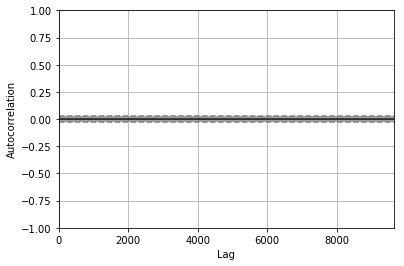

In [3]:
autocorrelation_plot(data['cgmValue'])
plt.show()




In [29]:


model = ARIMA(data['cgmValue'].loc[data['cgmValue'].notnull()], order=(1, 1, 1))
model_fit = model.fit()



c:\users\joris\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\joris\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [27]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.cgmValue   No. Observations:                 2949
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11263.111
Method:                       css-mle   S.D. of innovations             11.025
Date:                Sun, 10 Feb 2019   AIC                          22534.222
Time:                        18:38:08   BIC                          22558.179
Sample:                             1   HQIC                         22542.846
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0333      0.622     -0.054      0.957      -1.253       1.186
ar.L1.D.cgmValue     0.4720      0.019     25.418      0.000       0.436       0.508
ma.L1.D.cgmValue     0.6190 

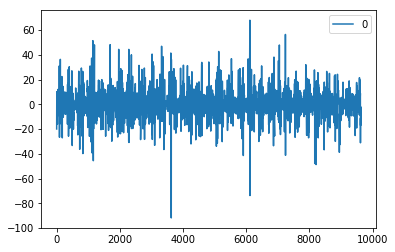

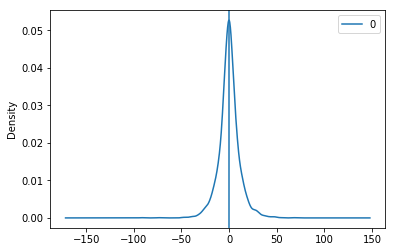

                 0
count  2949.000000
mean      0.000225
std      11.030996
min     -91.828297
25%      -5.219099
50%      -0.139370
75%       5.131314
max      67.894281


In [28]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.axvline(x=0, ymin=0, ymax=1)
plt.show()
print(residuals.describe())